In [ ]:
!pip install scikit-multilearn
!pip install wordcloud
!pip install imblearn

     |████████████████████████████████| 92kB 5.7MB/s 


In [3]:
3import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud, STOPWORDS
from google.colab import drive

In [4]:
drive.mount('/content/drive')

Mounted at /content/drive


# Text Data Analysis

In [5]:
df = pd.read_csv('/content/drive/MyDrive/Datasets/Malignant Comments Classifier Project/train.csv')

In [ ]:
df.head(3)

id  ... loathe
0  0000997932d777bf  ...      0
1  000103f0d9cfb60f  ...      0
2  000113f07ec002fd  ...      0

[3 rows x 8 columns]

In [6]:
df.drop('id', axis = 1, inplace = True)

In [ ]:
df['sum'] = df.iloc[:, 1:].sum(axis=1)

In [ ]:
print('No of clean comments = ', df[df['sum'] == 0].shape[0])
print('No of malignant comments = ', df[df['malignant'] == 1].shape[0])
print('No of highly_malignant comments = ', df[df['highly_malignant'] == 1].shape[0])
print('No of rude comments = ', df[df['rude'] == 1].shape[0])
print('No of threatning comments = ',df[df['threat'] == 1].shape[0])
print('No of abusive comments = ', df[df['abuse'] == 1].shape[0])
print('No of loathsome comments = ', df[df['loathe'] == 1].shape[0])

No of clean comments =  143346
No of malignant comments =  15294
No of highly_malignant comments =  1595
No of rude comments =  8449
No of threatning comments =  478
No of abusive comments =  7877
No of loathsome comments =  1405


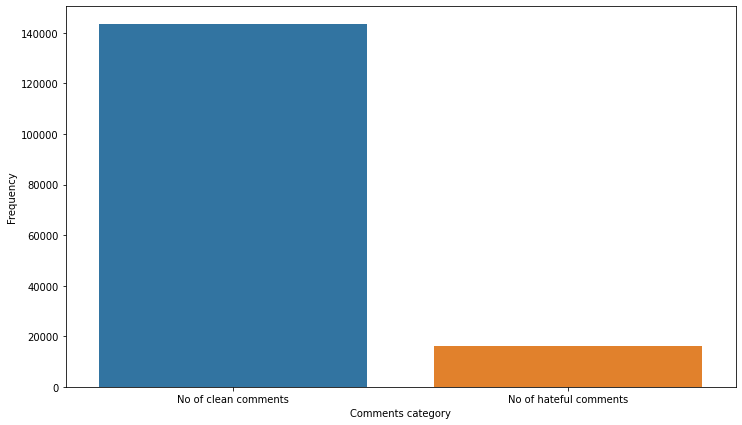

In [ ]:
x_labels = ['No of clean comments', 'No of hateful comments']
y_labels = [df[df['sum'] == 0].shape[0], df[df['sum']>0].shape[0]]
plt.figure(figsize = (12,7))
sns.barplot(x = x_labels, y = y_labels)
plt.xlabel('Comments category')
plt.ylabel('Frequency');

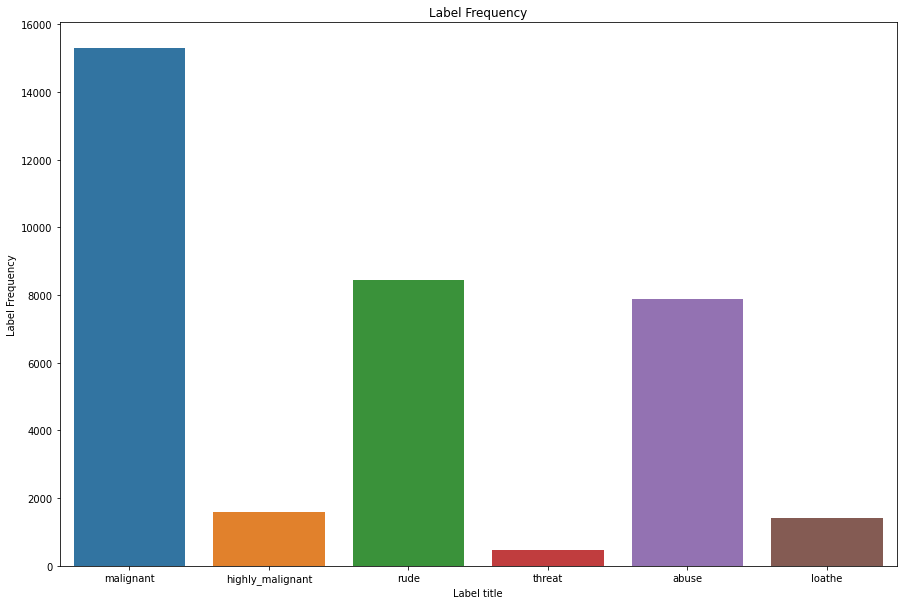

In [ ]:
hateful =df[df['sum']>0]
label_freq = []
for i in hateful.iloc[:, 1:-1].columns:
  label_freq.append(hateful[hateful[i] == 1].shape[0])

plt.figure(figsize = (15,10))
sns.barplot(x = hateful.iloc[:,1:-1].columns,
           y = label_freq)
plt.xlabel('Label title')
plt.ylabel('Label Frequency')
plt.title('Label Frequency');

Text(0, 0.5, 'Frequency')

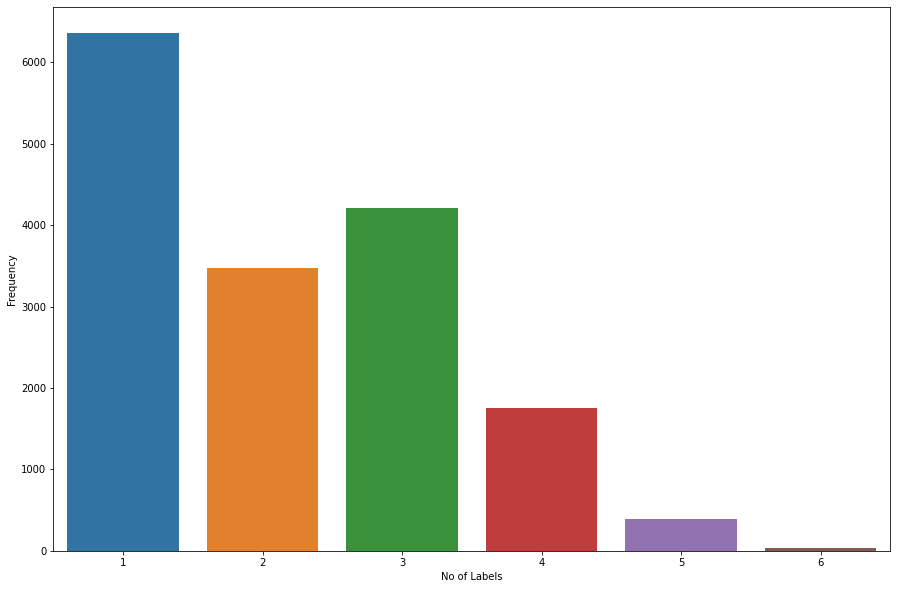

In [ ]:
#How many comments have multiple labels?
plt.figure(figsize = (15,10))
sns.barplot(x = df[df['sum']>0].groupby('sum')['sum'].count().index,
            y = df[df['sum']>0].groupby('sum')['sum'].count().values)
plt.xlabel('No of Labels')
plt.ylabel('Frequency')

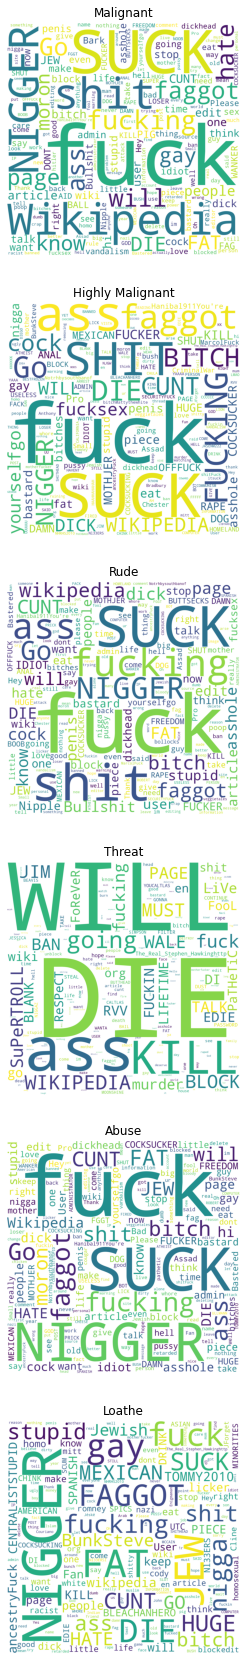

In [ ]:
plt.figure(figsize = (12,30))

text = df[df['malignant'] == 1]['comment_text'].values
cloud_malignant = WordCloud(stopwords=STOPWORDS, collocations=False,height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(6,1, 1)
plt.axis('off')
plt.imshow(cloud_malignant)
plt.title('Malignant');

text = df[df['highly_malignant'] == 1]['comment_text'].values
cloud_high_malignant = WordCloud(stopwords=STOPWORDS, collocations=False, height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(6,1, 2)
plt.axis('off')
plt.imshow(cloud_high_malignant)
plt.title('Highly Malignant');

text = df[df['rude'] == 1]['comment_text'].values
cloud_rude = WordCloud(stopwords=STOPWORDS, collocations=False,
                       height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(6,1, 3)
plt.axis('off')
plt.imshow(cloud_rude)
plt.title('Rude');

text = df[df['threat'] == 1]['comment_text'].values
cloud_threat = WordCloud(stopwords=STOPWORDS, collocations=False, height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(6,1, 4)
plt.axis('off')
plt.imshow(cloud_threat)
plt.title('Threat');

text = df[df['abuse'] == 1]['comment_text'].values
cloud_abuse = WordCloud(stopwords=STOPWORDS, collocations=False, height = 1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(6,1, 5)
plt.axis('off')
plt.imshow(cloud_abuse)
plt.title('Abuse');

text = df[df['loathe'] == 1]['comment_text'].values
cloud_loathe = WordCloud(stopwords=STOPWORDS, collocations=False, height =1500, width = 1500, background_color = 'white').generate(" ".join(text))
plt.subplot(6,1, 6)
plt.axis('off')
plt.imshow(cloud_loathe)
plt.title('Loathe');

# Data Cleaning for scikit multilearn

In [ ]:
import string
print(string.punctuation)

!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~


In [7]:
import re
import string

import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [8]:
def text_clean(row):
    row = re.sub('\n', ' ', row)                                                             #For removing \n in the comments
    row = re.sub('@[A-Za-z0-9]', '', row)                                                    #For removing any usernames
    row = re.sub("""[!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~]""", ' ', row)                         #For removing punctuations
    row = row.split()                                                                       #For removing the stopwords
    row = [word for word in row if word not in stop_words]
    row = (' ').join(row)                                                             
    return row
df['comment_text'] = df['comment_text'].apply(text_clean)

In [9]:
from nltk.stem.porter import PorterStemmer
porter =PorterStemmer()
def stem_words(row):
    row = [porter.stem(word) for word in row]
    row = ('').join(row)
    return row
df['comment_text'] = df['comment_text'].apply(stem_words)

In [10]:
#Spliting the data into train and testing set
from sklearn.model_selection import train_test_split

df = df.sample(frac = 1)

X = df['comment_text']
try:
  y = df.drop(['comment_text', 'sum'], axis = 1)
except:
  y = df.drop('comment_text', axis= 1)
X_train, X_test, y_train, y_test = train_test_split(X,y, random_state = 10)

In [ ]:
#Vectorizing the data
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

vectorizer = TfidfVectorizer(min_df = 5, ngram_range = (1,3), max_features = 2000).fit(X_train)

vocab = vectorizer.get_feature_names()
print('vocab size = ', len(vocab))

vocab size =  2000


COMMENT: session crashes if vocab size > 2000

In [ ]:
X_train_vect = vectorizer.transform(X_train)
X_test_vect = vectorizer.transform(X_test)

#Model Training

In [ ]:
#We are done with data preprocessing, its time to build our model
from skmultilearn.problem_transform import BinaryRelevance
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
naive_bayes = BinaryRelevance(GaussianNB()).fit(X_train_vect, y_train)

y_pred_train = naive_bayes.predict(X_train_vect)
y_pred_test  = naive_bayes.predict(X_test_vect)

print('Training accuracy = ', accuracy_score(y_train.values, y_pred_train))
print()       
print('Testing accuracy = ', accuracy_score(y_test.values, y_pred_test))

Training accuracy =  0.4832132889921289

Testing accuracy =  0.4810618404231319


In [ ]:
# using Label Powerset
from skmultilearn.problem_transform import LabelPowerset

label_powerset = LabelPowerset(DecisionTreeClassifier()).fit(X_train_vect, y_train)

y_pred_train = label_powerset.predict(X_train_vect)
y_pred_test = label_powerset.predict(X_test_vect)

print('Training accuracy = ', accuracy_score(y_train.values, y_pred_train))
print()
print('Testing accuracy = ', accuracy_score(y_test.values, y_pred_test))


Training accuracy =  0.9943431541302495

Testing accuracy =  0.8902564359662096


In [ ]:
from sklearn.multioutput import MultiOutputClassifier
from sklearn.ensemble import RandomForestClassifier

random_forests = MultiOutputClassifier(RandomForestClassifier()).fit(X_train_vect, y_train)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred_train = random_forests.predict(X_train_vect)
y_pred_test  = random_forests.predict(X_test_vect)

print('Training accuracy = ', accuracy_score(y_train, y_pred_train))
print()
print('Testing accuracy = ', accuracy_score(y_test, y_pred_test))

Training accuracy =  0.9942595965841675

Testing accuracy =  0.9102850124081919


# Deep Learning: LSTM 

### Data Preprocessing

In [11]:
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences

In [12]:
tokenizer = Tokenizer(num_words = 25000, oov_token = '<OOV>')

tokenizer.fit_on_texts(X_train)

word_index = tokenizer.word_index
print('Word Index length= ', len(word_index))

Word Index length=  161940


In [13]:
max_len = 300

In [14]:
#converting texts to sequences
X_train_tokens = tokenizer.texts_to_sequences(X_train)
X_test_tokens = tokenizer.texts_to_sequences(X_test) 

In [15]:
#Padding the sequences
X_train_pad = pad_sequences(X_train_tokens, maxlen = max_len, truncating = 'post')
X_test_pad = pad_sequences(X_test_tokens, maxlen = max_len, truncating='post')

### Model Building

In [16]:
#Defining model

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense

model = Sequential([
                    Embedding(25000, 64, input_length = max_len),
                    LSTM(64, dropout = 0.2, recurrent_dropout = 0.2, return_sequences = True),
                    LSTM(64, dropout = 0.2),
                    Dense(6, activation = 'sigmoid')
])


In [17]:
model.compile(optimizer = 'adam',
              loss = 'binary_crossentropy',
              metrics = 'accuracy')

### Model Training

In [20]:
checkpoint_filepath = '/content/drive/MyDrive/Deep learning model/Malignant_comments/'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=True,
    monitor='accuracy',
    mode='max',
    save_best_only=True)


In [21]:
early_stop = tf.keras.callbacks.EarlyStopping(
    monitor='accuracy', min_delta=0.1, patience=2, verbose=0,
    mode='auto', baseline=None, restore_best_weights=False
)


In [22]:
history = model.fit(X_train_pad, y_train.values, epochs = 5, callbacks=[model_checkpoint_callback, early_stop])

Epoch 1/5
3740/3740 [==============================] - 3338s 884ms/step - loss: 0.1106 - accuracy: 0.9663
Epoch 2/5
3740/3740 [==============================] - 3291s 880ms/step - loss: 0.0468 - accuracy: 0.9943
Epoch 3/5
3740/3740 [==============================] - 3280s 877ms/step - loss: 0.0429 - accuracy: 0.9924


In [26]:
model.load_weights('/content/drive/MyDrive/Deep learning model/Malignant_comments/')

In [27]:
model.evaluate(X_test_pad, y_test.values)

1247/1247 [==============================] - 75s 60ms/step - loss: 0.0489 - accuracy: 0.9940


[0.04894624277949333, 0.9939839243888855]

In [ ]:
y_pred = model.predict(X_test_pad)

The model is good, but fails to recognise threat and abuse labels.

In [ ]:
def predict_labels_ML(sentence):
  results = []
  labels = ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']
  sentence = text_clean(sentence)
  sentence = vectorizer.transform([sentence])
  predictions = random_forests.predict(sentence)
  print(predictions)
  for i, label in enumerate(labels):
    if (predictions[0][i] > 0.3):
      results.append(label)
  print('The results are the foll: ', results)

In [ ]:
predict_labels_ML("""Yo bitch Ja Rule is more succesful then you'll ever be whats up with you and hating you sad mofuckas...i should bitch slap ur pethedic white faces and get you to kiss my ass you guys sicken me. Ja rule is about pride in da music man. dont diss that shit on him. and nothin is wrong bein like tupac he was a brother too...fuckin white boys get things right next time.,""")

[[1 0 1 0 1 0]]
The results are the foll:  ['malignant', 'rude', 'abuse']


In [36]:
def final_results(text_df):
  text_df = text_df.apply(text_clean)
  text_df = text_df.apply(stem_words)
  tokens = tokenizer.texts_to_sequences(text_df.values)
  text_padded = pad_sequences(tokens, maxlen = max_len,  truncating='post')
  results = model.predict(text_padded)
  return results

In [30]:
test = pd.read_csv('/content/drive/MyDrive/Datasets/Malignant Comments Classifier Project/test.csv')

In [32]:
test.drop('id', axis = 1, inplace = True)

In [37]:
res = final_results(test['comment_text'])

In [39]:
res.shape


(153164, 6)

In [40]:
res = np.where(res>0.3,1,0)

In [41]:
res

array([[1, 1, 1, 0, 1, 0],
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       ...,
       [0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0],
       [1, 0, 1, 0, 1, 0]])

In [43]:
test_results = pd.DataFrame(res)
test_results.columns =  ['malignant', 'highly_malignant', 'rude', 'threat', 'abuse', 'loathe']

In [45]:
test_results.to_csv('/content/drive/MyDrive/Datasets/Malignant Comments Classifier Project/test_results.csv')